# Jupyter Übung
Ein Übungsdatensatz *Daten_Uebung.csv* soll gefittet und geplottet werden.
Zu diesem Zweck werden zunächst alle notwendigen Libraries importiert. Da ich schon damit rechnen kann (wäre auch seltsam wenn nicht), dass die Datei x- und y-Daten enthält kann ich hier auch gleich die entsprechenden numpy arrays definieren.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv

xarr, yarr = np.zeros(0), np.zeros(0)

Jetzt wird die File geöffnet und die parameter zum lesen in `read` abgelegt. Das argument `delimiter` hat zwar schon als default den wert `','`, also das Komma als Trennzeichen, der Lesbarkeit wegen gebe ich es aber trotzdem explizit an.
Jede Zeile wird die Datenstruktur `list` mit der Länge 2 haben. Die Einträge sind vom Datentyp `string` und werden auf dem Weg in die arrays in integer geändert (andernfalls kommt später nur Gullasch raus).  
Je Zeile ein Datenpunkt mit x- und y-Koordinaten. Über diese Zeilen wird jetzt in der Schleife iteriert und ihr Inhalt an die oben definierten arrays angehangen.

Ausnahme ist hier die erste Zeile der .csv, die die Achsenbeschriftungen enthält. Sie wird in eine separate Variable gespeichert.

In [12]:
with open('Daten_Uebung.csv', newline='', encoding='utf-8') as datafile:
    read = csv.reader(datafile, delimiter=',')
    for i,row in enumerate(read):
        if i > 0:
            # xlist.append(int(row[0]))
            # ylist.append(int(row[1]))
            xarr = np.append(xarr, int(row[0]))
            yarr = np.append(yarr, int(row[1]))
        else:
            labels = row

Mal sehen, ob das gefunzt hat

In [13]:
print(labels[0])
print(xarr)
print(labels[1])
print(yarr)

﻿Zeit
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150.]
Impulse
[107.  83.  60.  46.  36.  28.  20.  18.  12.  11.   7.   5.   5.   4.
   2.   2.]


## Der erste Plot
Jetzt, da die Daten verfügbar sind, kann es mit der plotting magic losgehen. Hier fange ich erst mal mit der primitivst möglichen Variante an.

<function matplotlib.pyplot.show(close=None, block=None)>

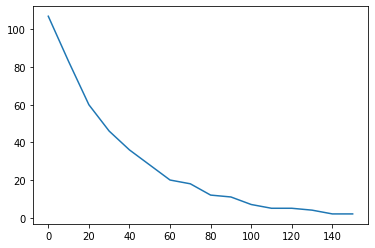

In [14]:
plt.plot(xarr, yarr)
plt.show

Bisschen besser ist hier aber ein `scatter()` plot. Bisschen customizing gegenüber den defaults geht auch noch. Hier nehme ich als Größe der Datenpunkte 2pt in der Farbe Dunkelrot.
Die Farbe wird in hexadezimalwerten nach der RGB Konvention angegeben. In diesem fall entspricht `#7D0000` den werten für Rot, Grün und Blau jeweils 125, 0, 0 (windows rechner hilft, online irgendwo geht aber auch).

<function matplotlib.pyplot.show(close=None, block=None)>

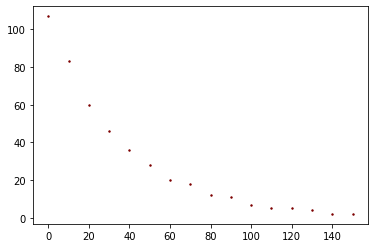

In [15]:
plt.scatter(xarr, yarr, s=2, c='#7D0000')
plt.show

## Fitting

Wir definieren eine Modelfunktion. In diesem Fall eine Exponentialfunktion in der Form
$A \cdot e^{-\lambda \cdot x} + B$

In [16]:
def funct(x, a, b, c):
    return a * np.exp(-1 * b * x) + c

Und stecken sie als ersten Parameter zusammen mit den Datenpunkten in scipys `curve_fit()`:

In [17]:
popt, pcov = curve_fit(funct, xarr, yarr)
perr = np.sqrt(np.diag(pcov))
print("Optimale Parameter:")
print("A:", popt[0], " lambda:", popt[1], " B:", popt[2])
print(perr)

Optimale Parameter:
A: 106.35768580062256  lambda: 0.027759007055339478  B: 0.774113345768274
[9.96034348e-01 6.59657837e-04 6.36443320e-01]
<ipython-input-16-095d9ff36723>:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-1 * b * x) + c


Und plotten das Ergebnis (mit deutlich mehr Kosmetik):

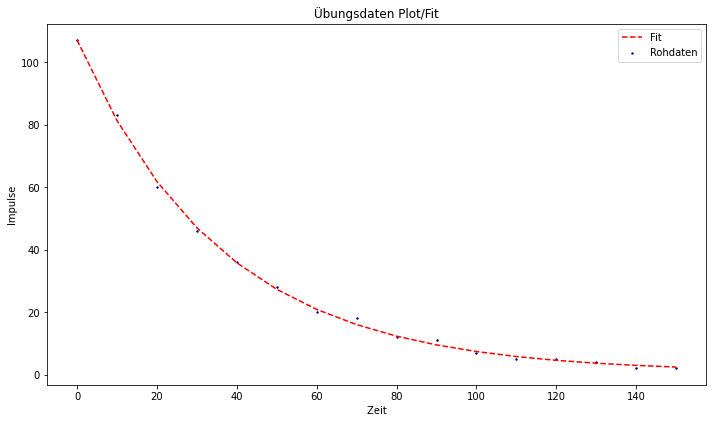

In [18]:
cm = 1/2.54 # inch zu cm

fig, ax = plt.subplots(figsize=(30*cm, 16.875*cm)) # 16/9 aspect

ax.scatter(xarr, yarr, s=2, c='#00007D', label='Rohdaten')
ax.plot(xarr, funct(xarr, *popt), 'r--', label='Fit')
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_title('Übungsdaten Plot/Fit')
ax.legend()

Awesome :)